# Objective:
This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy).
The goal here is to model the probability that a business goes bankrupt from different features.
The data file contains 7 features about 250 companies
The data set includes the following variables:

1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.


2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.


3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.


4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.


5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.


6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.


7.	class: bankruptcy, non-bankruptcy (target variable).


# Table of Contents
Load data
 1.1 Import the libraries
 1.2 Load the dataset
Exploratory Data Analysis
 2.1 Understanding dataset
 2.2 Data Visualization
      1)Univariabte Analysis
      2)Bivariant visu
 2.3 Data Cleaning
 
Model Buliding

3.1 Normalization 3.2 Slicing 3.3 Train-Test Split 3.4 Processing Model

Model Evalution

4.1 Accuracy Table 4.2 Saving Model

## 1. Load Data

##### Import the Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
#from sklearn.ensemble import IsolationForest
# data transformation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB as mb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import VotingClassifier
#from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import  DecisionTreeClassifier  
from sklearn import tree #plot tree
from sklearn.metrics import classification_report#,accuracy_score,r2_score
from sklearn import preprocessing

##### Load the Dataset

In [2]:
data=pd.read_excel("bankruptcy-prevention.xlsx")
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


## 2. Exploratory Data Analysis

### First step --Understanding Dataset

In [3]:
#to find the shape of the data

data.shape

(250, 7)

In [4]:
# to check how many columns present in dataset

data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [5]:
# to check whether null values present in dataset
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [6]:
data.size

1750

In [7]:
#data type conversion

data.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [8]:
# to check how many entries in data and their data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


# All 250 enteries are done in dataset no null or missing value in data

In [9]:
# checking statistical parameters

data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking count of each categories for every columns

In [10]:
cat = data.columns.to_list()
print("Value count for each category:\n")
for col in cat:
    print(col,"\n",data[col].value_counts(),"\n") 

Value count for each category:

industrial_risk 
 1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64 

 management_risk 
 1.0    119
0.5     69
0.0     62
Name:  management_risk, dtype: int64 

 financial_flexibility 
 0.0    119
0.5     74
1.0     57
Name:  financial_flexibility, dtype: int64 

 credibility 
 0.0    94
1.0    79
0.5    77
Name:  credibility, dtype: int64 

 competitiveness 
 0.0    103
1.0     91
0.5     56
Name:  competitiveness, dtype: int64 

 operating_risk 
 1.0    114
0.0     79
0.5     57
Name:  operating_risk, dtype: int64 

 class 
 non-bankruptcy    143
bankruptcy        107
Name:  class, dtype: int64 



non-bankruptcy has a highest count from the all category.

In [11]:
#to find unique values in data

data.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

In [12]:
# to chceck null values present in data or not
data.isnull()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False


In [13]:
data.duplicated().sum()


147

# **Univariate Analysis**

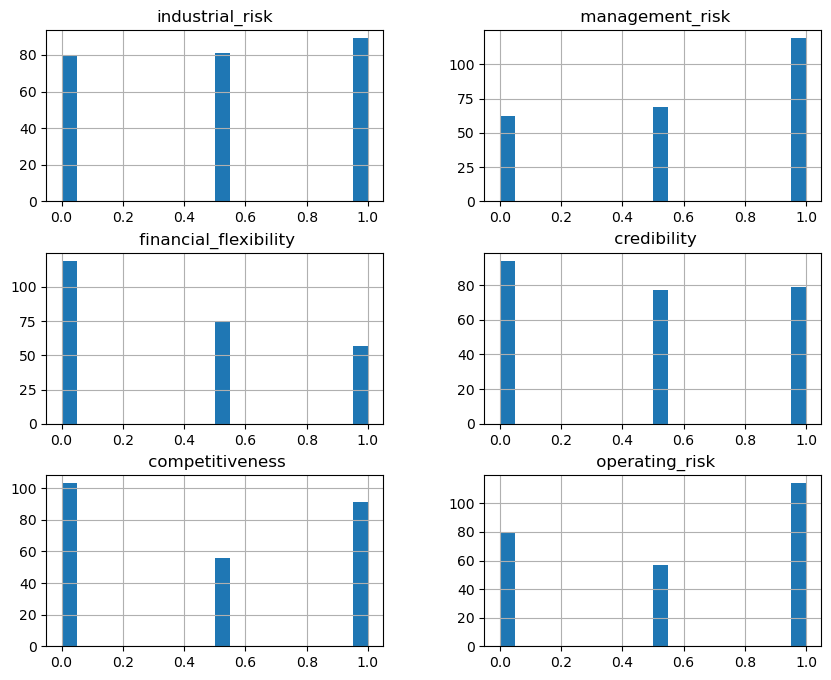

In [14]:
# Histogram for Numerical Columns:
data.hist(figsize=(10, 8), bins=20)
plt.show()

In [15]:
data.duplicated().sum()

147

their is 147 duplicated values found in the dataset

In [16]:
data.skew()

industrial_risk          -0.067011
 management_risk         -0.444701
 financial_flexibility    0.479134
 credibility              0.112955
 competitiveness          0.093906
 operating_risk          -0.275547
dtype: float64

# Data Visualization

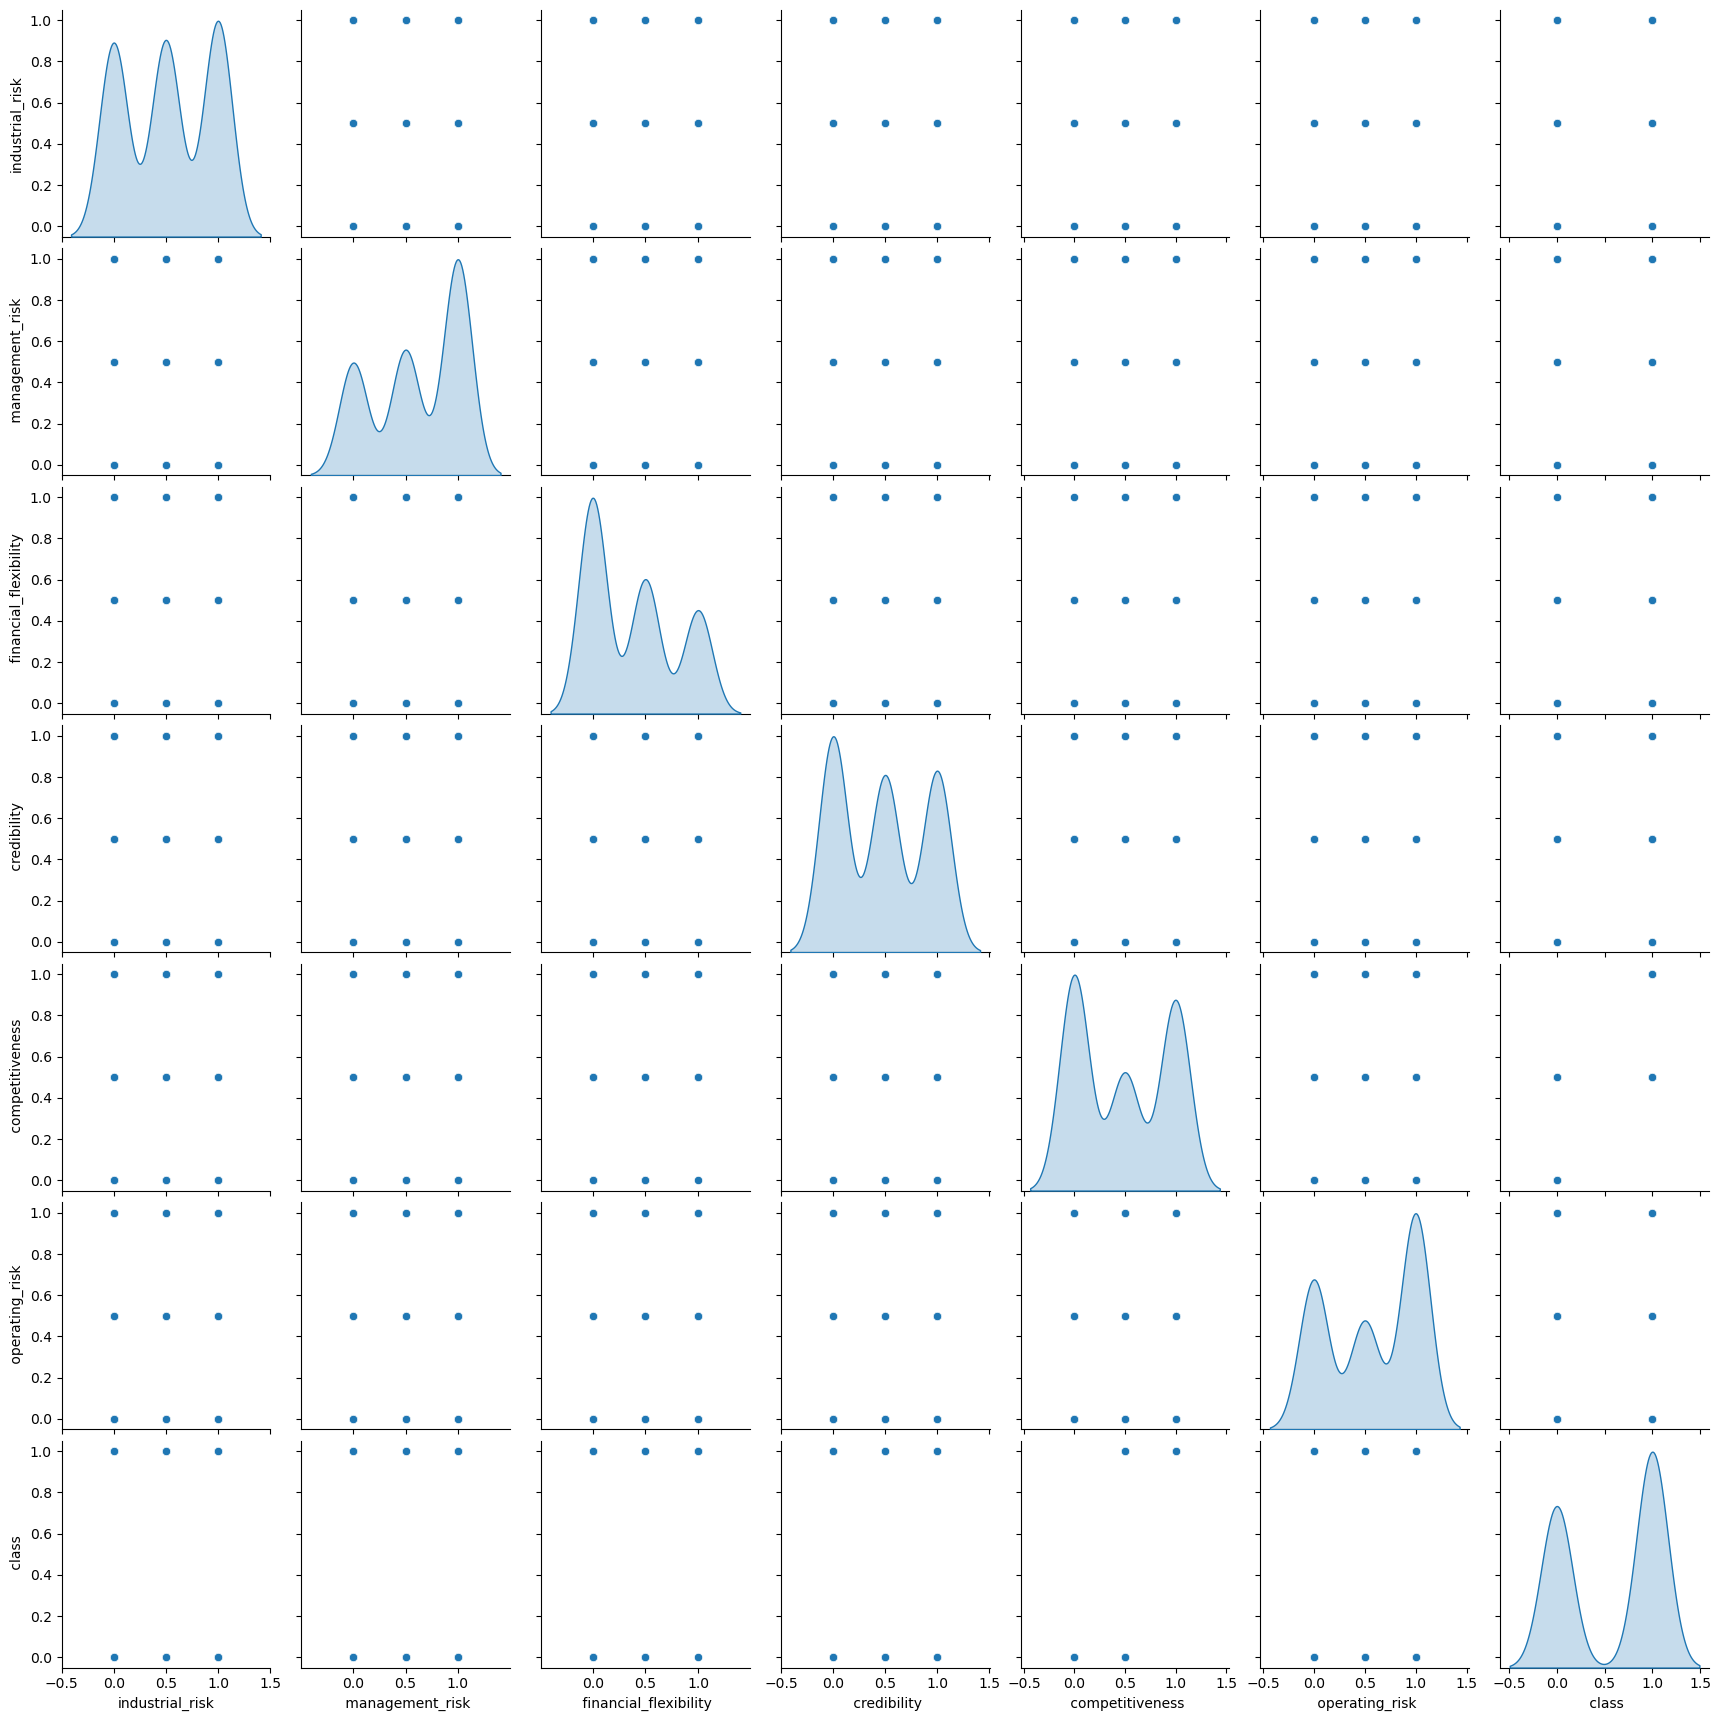

In [68]:
# Pairplot for numerical columns

sns.pairplot(data, diag_kind='kde')
plt.show()

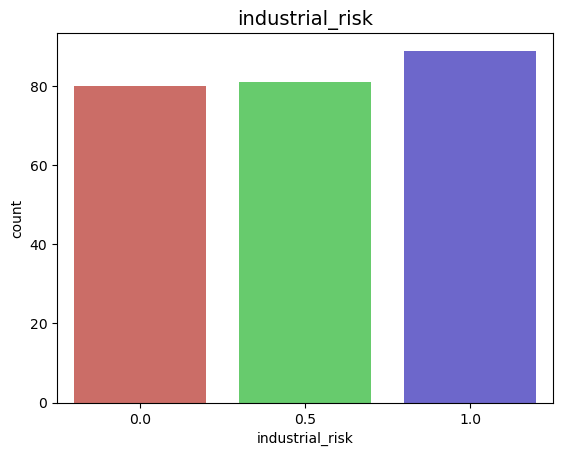

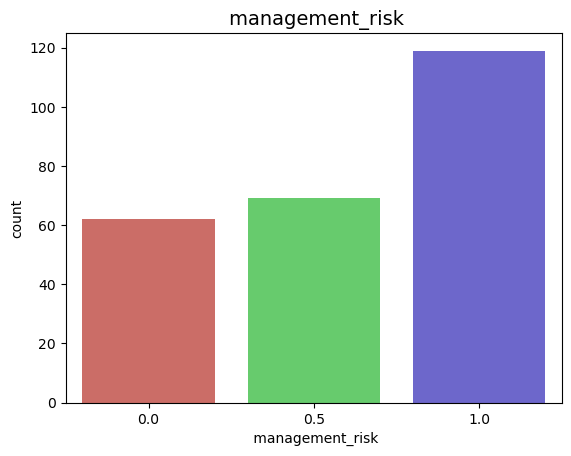

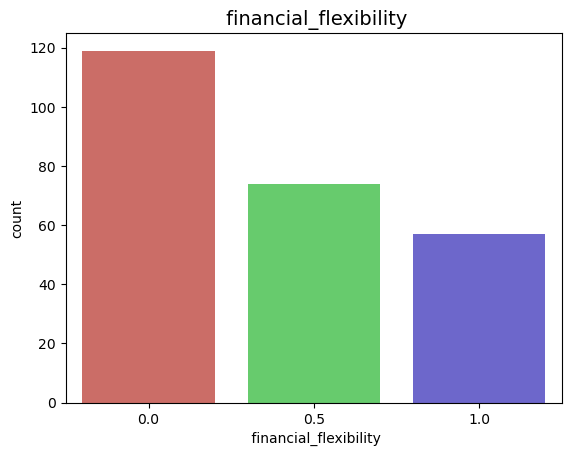

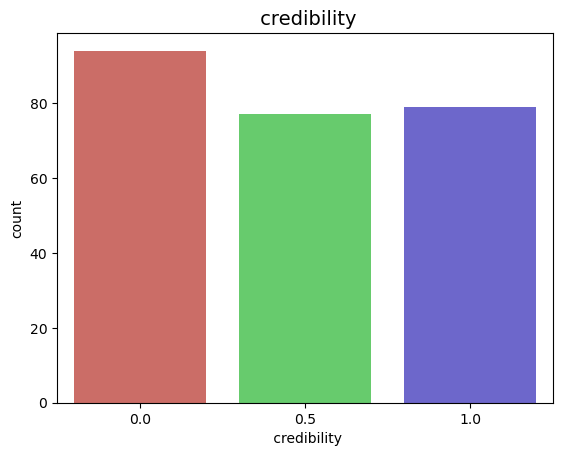

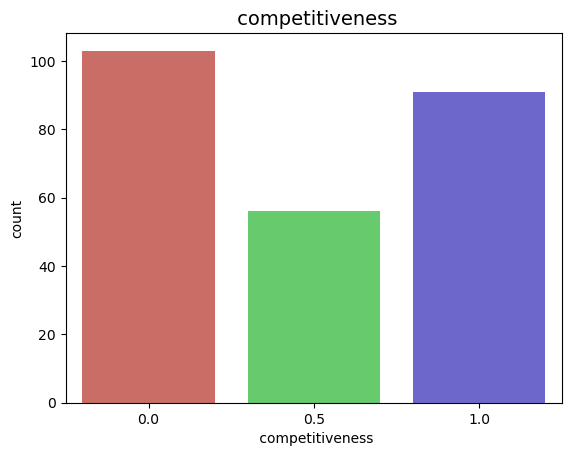

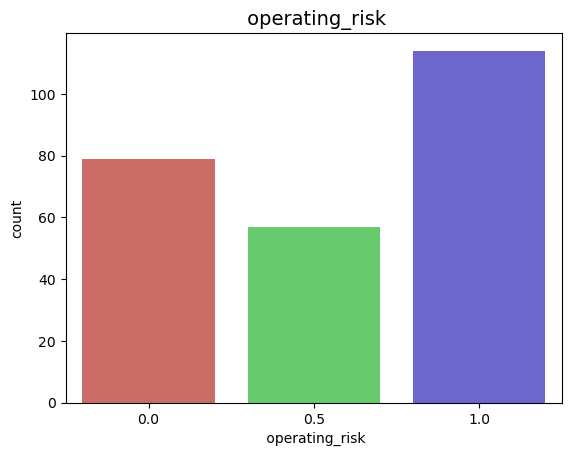

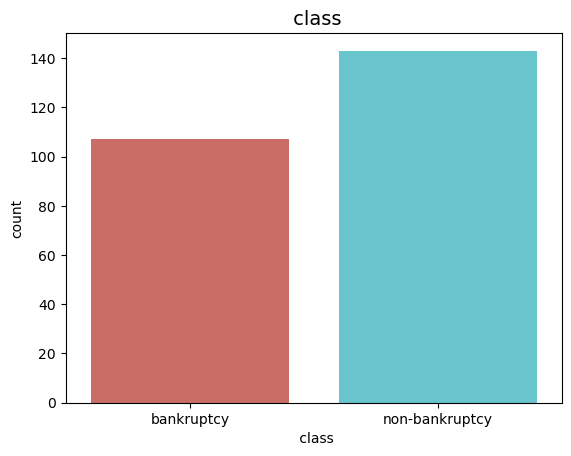

In [17]:
for col in cat[0:]:
    sns.countplot(x=col , data=data ,palette='hls')
    plt.title(col, fontsize=14)
    plt.show();

Most of the industrial risk count is equal to 80 or above 80 high risk count in industrial risk

Count of Management risk is high is equal to 120 and low and medium count is betwwen 60-70

Most of financial fexibility is low count

credibility is almost similar in low,medium and high

In our dataset most of data competitiveness is low or high

In data opertaing risk is high

as we can see in our data non-bankruptcy has a high count

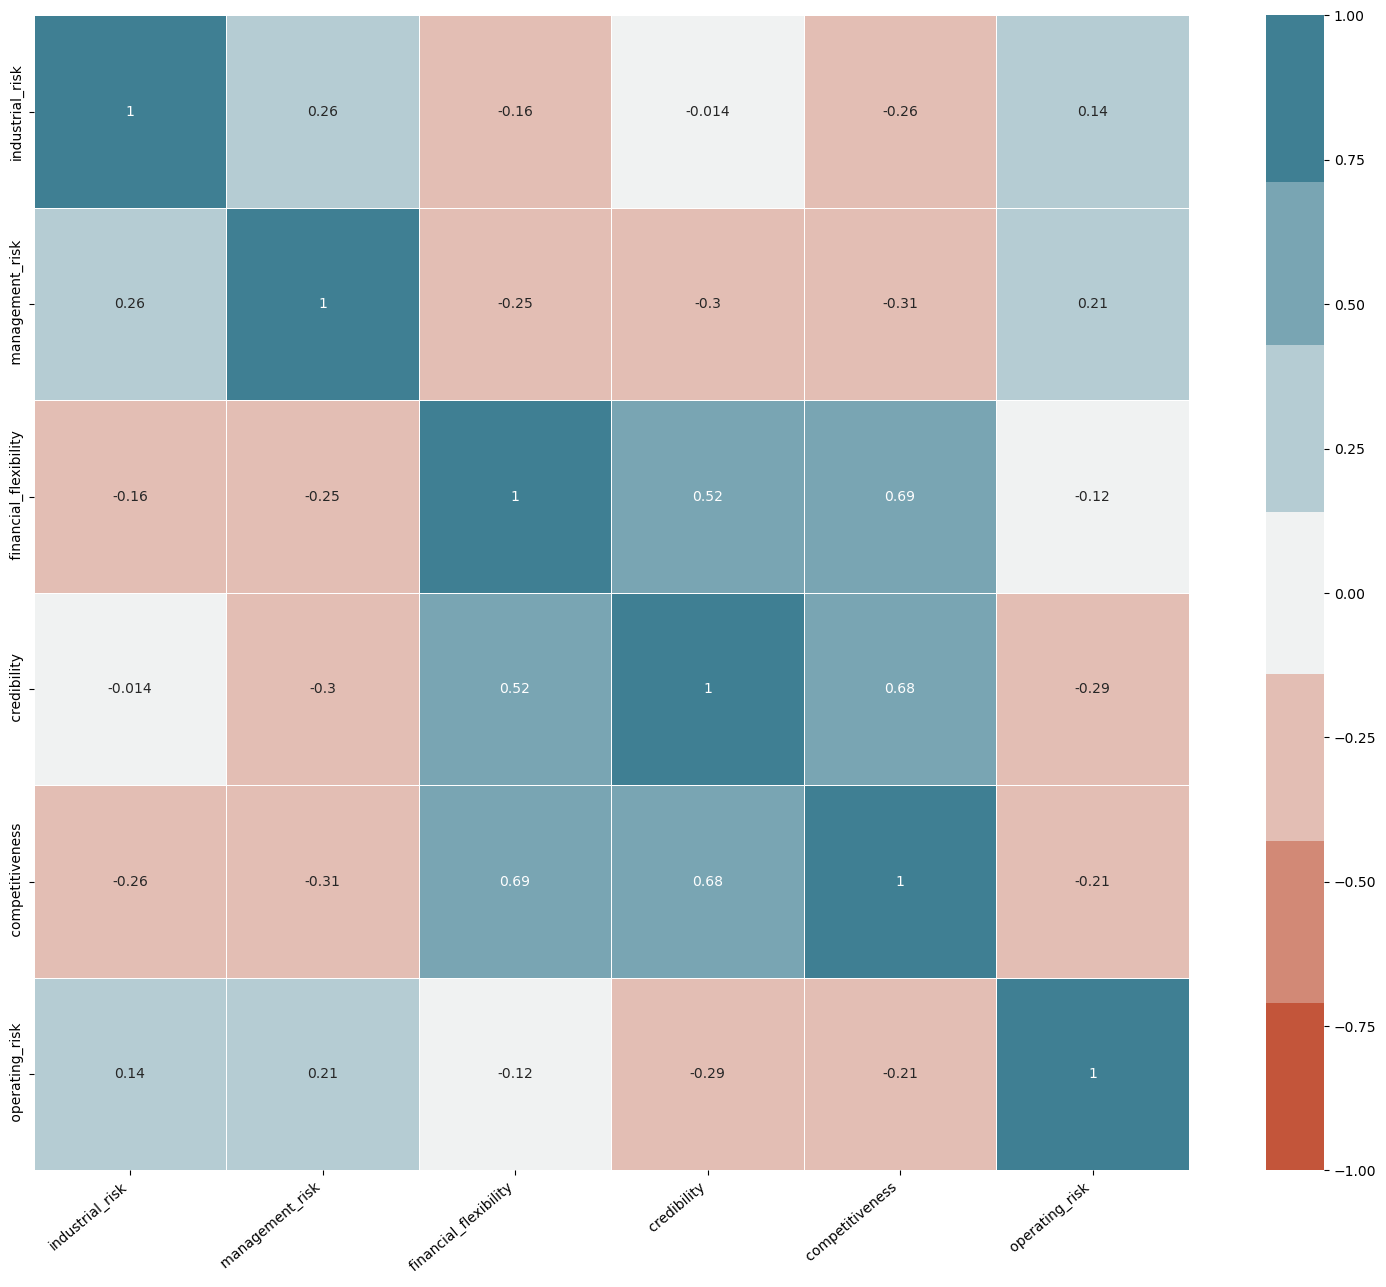

In [18]:
corr = data.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    
    corr, 
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=7),
    square=True,
    linewidths=.5,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,
    horizontalalignment='right'
    
);

industrial risk and management risk is mostly correlated with each other

financial flexibility is highly correlated with competitivness and credibility

similarly, competitivness is correlated with financial flexibility and credibility

similar for credibility

operating risk is correlated with industrial risk and management risk

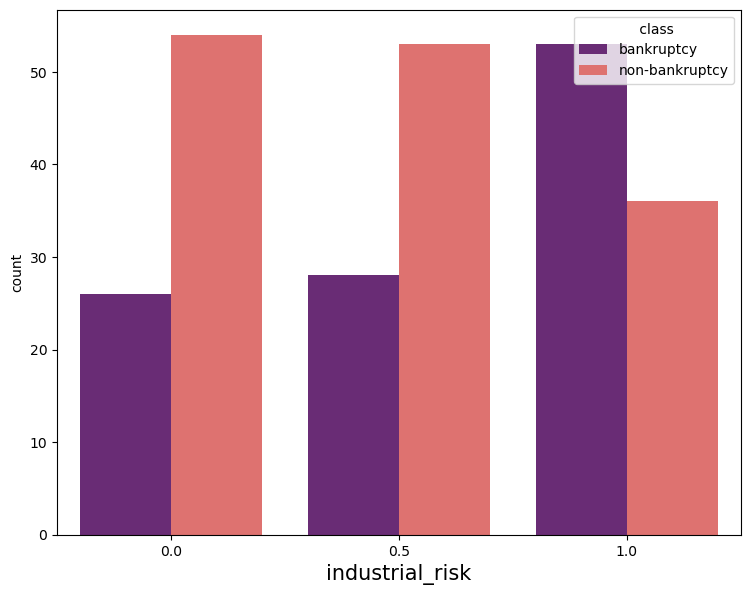

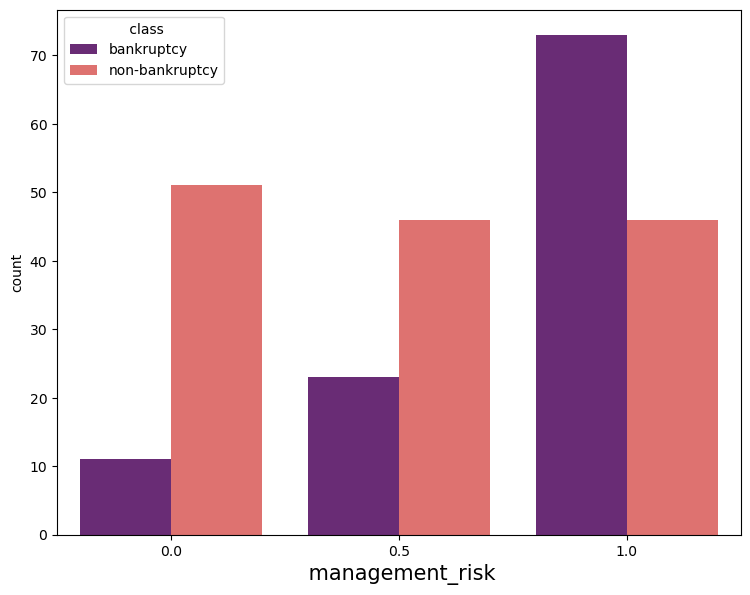

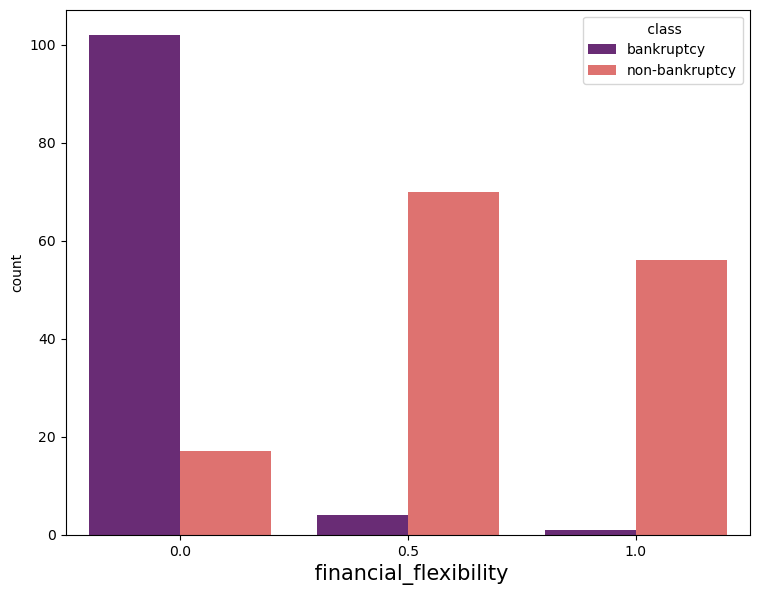

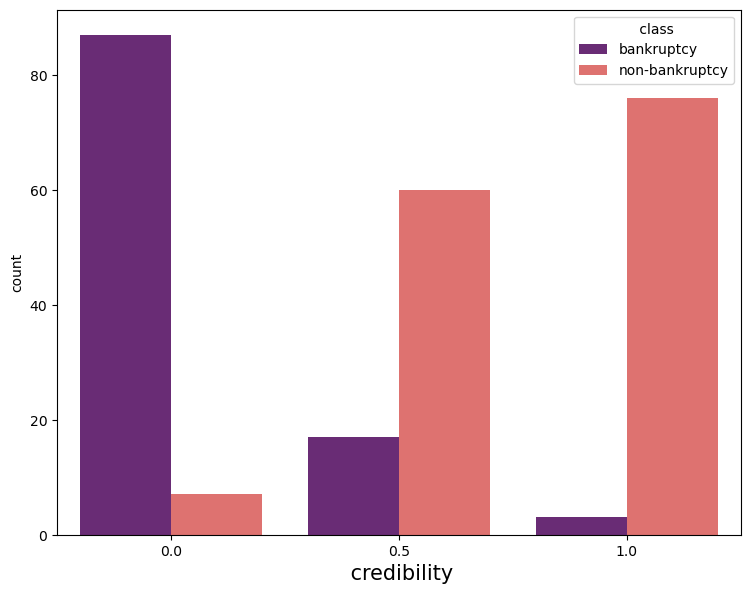

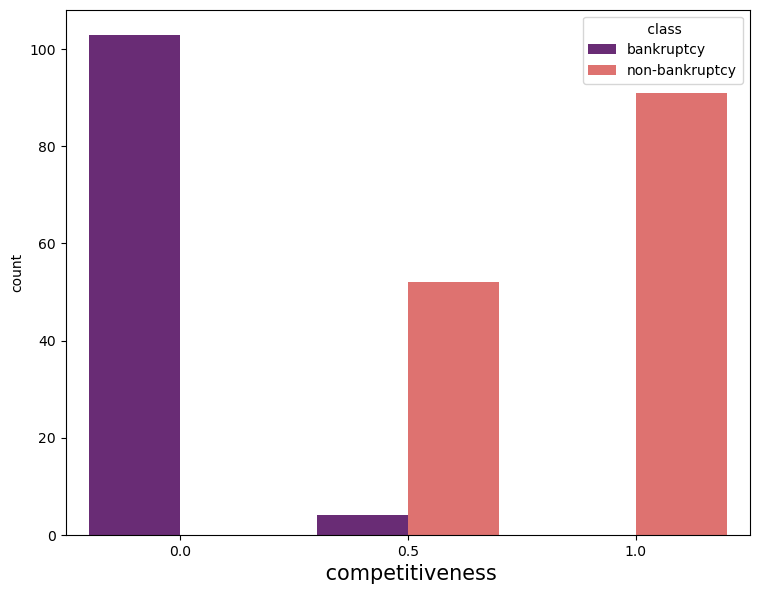

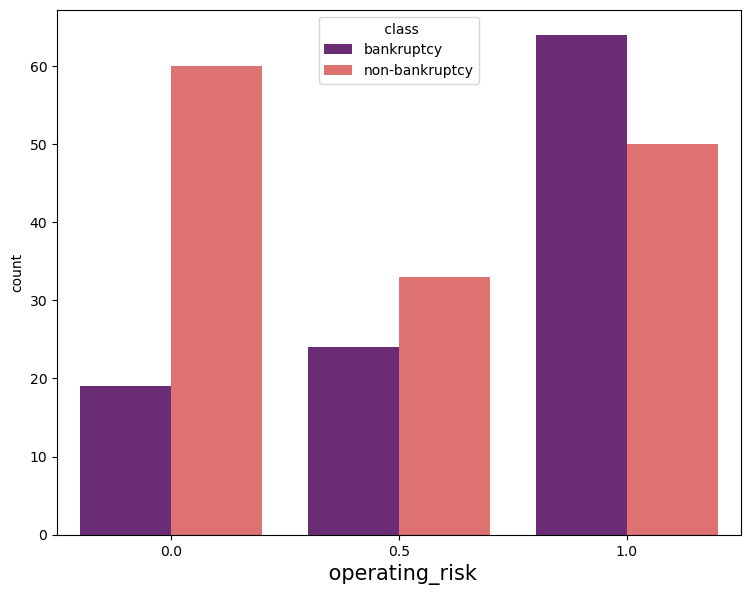

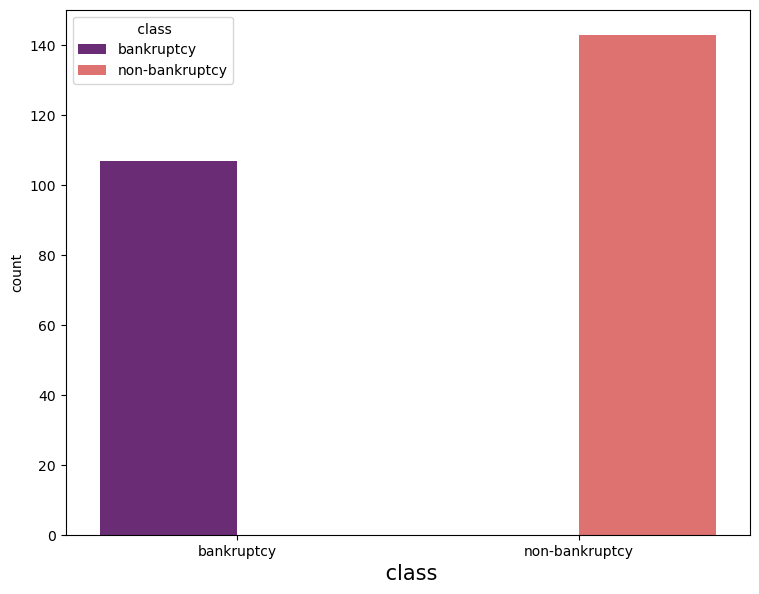

In [19]:
for col in cat[0:]: 
    plt.figure(figsize=(30,15))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue=' class', data=data ,palette='magma')
    plt.xlabel(col, fontsize=15)

<Axes: >

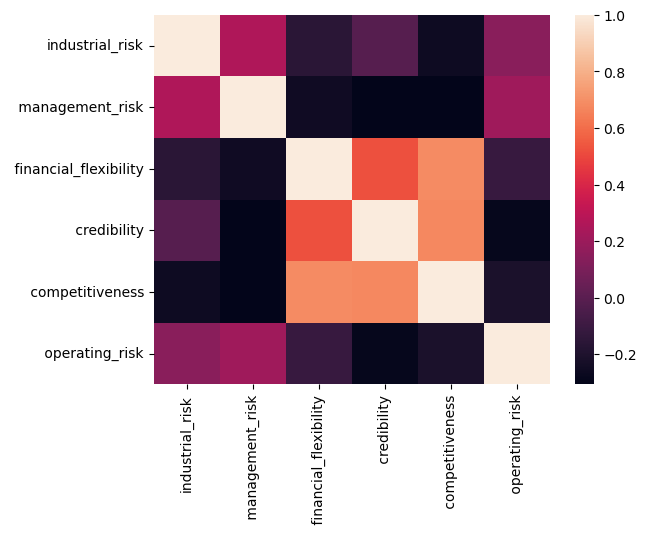

In [20]:
sns.heatmap(data.corr())

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data. 


# Data preprocessing

#### Encoding Data


In [21]:
#encode data
label_encoder = preprocessing.LabelEncoder()
data[' class']= label_encoder.fit_transform(data[' class']) 
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


Here bankruptcy is encoded with 0 and non-bankruptcy is encoded with 1

# Outlier Detection and Treatment


<Axes: >

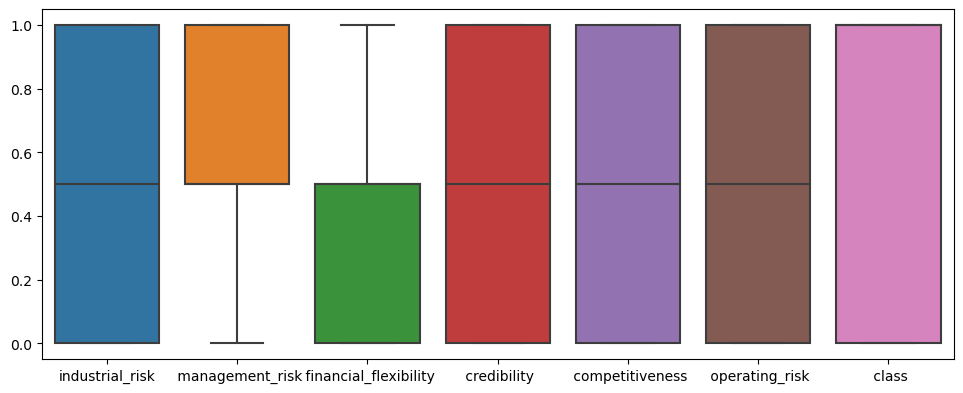

In [22]:
plt.figure(figsize=(40,10))
plt.subplot(2,3,1)   
sns.boxplot( data=data)

# Model Building

### Normalization

In [23]:
n = MinMaxScaler()
n.fit_transform(data.iloc[:,0:5])

array([[0.5, 1. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       ...,
       [0. , 1. , 1. , 0.5, 0.5],
       [1. , 0. , 0.5, 1. , 0.5],
       [1. , 0. , 0.5, 0.5, 1. ]])

### Slicing Data

In [24]:
# Slice the data
x= data.iloc[:,0:5]
y=data[' class']
x.shape,y.shape

((250, 5), (250,))

In [25]:
x

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness
0,0.5,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.5,0.0,0.0,0.5,0.0
4,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0
247,0.0,1.0,1.0,0.5,0.5
248,1.0,0.0,0.5,1.0,0.5


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name:  class, Length: 250, dtype: int32

In [27]:
y.value_counts()

1    143
0    107
Name:  class, dtype: int64

# Train_Test Split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
x_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness
106,0.0,1.0,0.0,0.0,0.5
243,0.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0
219,1.0,1.0,1.0,1.0,1.0
61,0.0,0.5,0.0,0.0,0.0
...,...,...,...,...,...
67,1.0,1.0,0.0,0.5,0.0
192,0.5,1.0,0.0,0.0,1.0
117,0.0,0.0,1.0,1.0,0.5
47,1.0,1.0,0.0,0.0,0.0


In [30]:
y_test

225    1
122    1
92     0
157    1
154    1
      ..
240    1
210    1
170    1
16     0
146    1
Name:  class, Length: 75, dtype: int32

In [31]:
y_train.value_counts()

1    96
0    79
Name:  class, dtype: int64

In [32]:
y_test.value_counts()

1    47
0    28
Name:  class, dtype: int64

The Process of Modeling the Data:
1.Importing the model

2.Fitting the model

3.Classification metrics

         - Score Metrics for Classification:

         - Accuracy= (TP+TN/(TP+TN+FP+FN)

         - Precision = (TP)/(TP+FP)

         - Recall = (TP)/(TP+FN)

         - f1 score - A number between 0 and 1, the harmonic mean of precision & 
           recall.

Models we will use:
  Logistic Classification

  Decision Tree Classifier

  Random Forest Regressor

  Bagging classifier

  Support Vector Machines

  K-Nearest Neighbours(KNN)
  
  AdaBoost Classification

  Naive Bayes
  

# Model Buliding Start

# Logistic Classifiaction

In [33]:
#Logistic regression and fit the model
classifier_lr = LogisticRegression(random_state=42)
classifier_lr.fit(x_train,y_train)
#Predict for X dataset
y_pred_lr = classifier_lr.predict(x_test)
y_pred_lr

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [34]:
# Confusion Matrix for the model accuracy
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_lr

array([[28,  0],
       [ 1, 46]], dtype=int64)

In [35]:
#Classification Report 
print (classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [36]:
y_pred_data= pd.DataFrame({'actual': y,
                         'predicted': classifier_lr.predict(x),
                        'p_0': [n[0] for n in classifier_lr.predict_proba(x)],
                        'p_1': [n[1] for n in classifier_lr.predict_proba(x)]})
y_pred_data

,actual,predicted,p_0,p_1
0,0,0,0.964383,0.035617
1,0,0,0.955464,0.044536
2,0,0,0.940446,0.059554
3,0,0,0.799888,0.200112
4,0,0,0.971569,0.028431
...,...,...,...,...
245,1,1,0.005323,0.994677
246,1,1,0.026580,0.973420
247,1,1,0.095661,0.904339
248,1,1,0.073797,0.926203


In [37]:
print(accuracy_score(y_test, y_pred_lr))

0.9866666666666667


# AUC Curve

auc accuracy: 0.9893617021276595


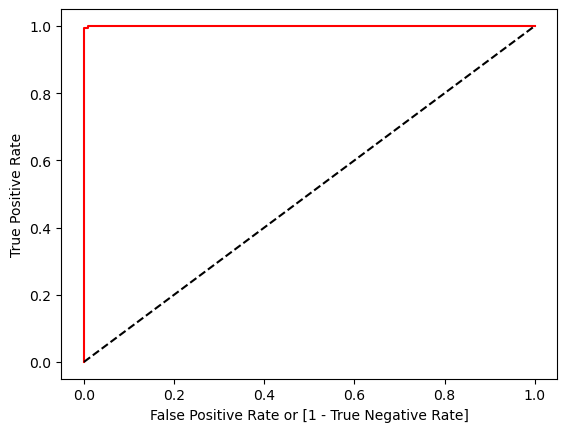

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier_lr.predict_proba(x)[:,1])

auc = roc_auc_score(y_test, y_pred_lr)

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(thresholds)

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
print('auc accuracy:',auc)

 The auc score is 0.98 its good classifier & “elbow” close to the coordinate (0,1).

# DECISION TREE


In [39]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

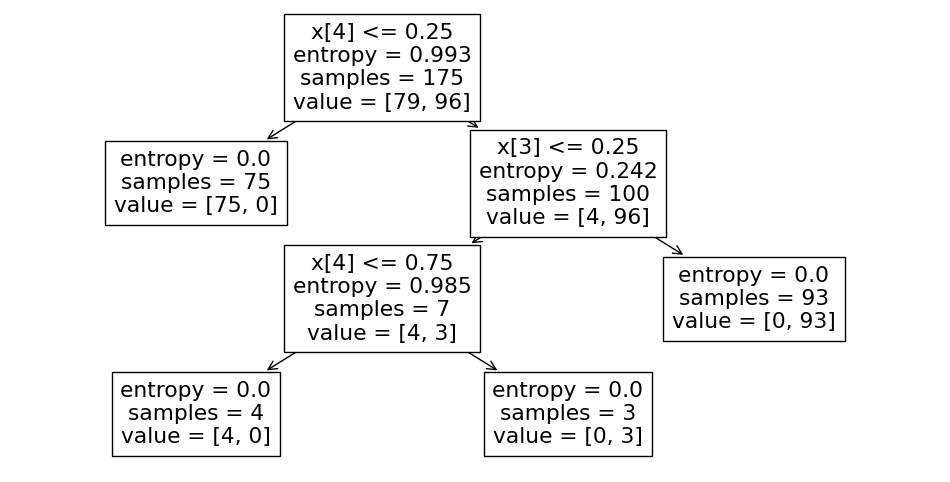

In [40]:
# Plotting Decision tree
plt.figure(figsize=(12,6))
tree.plot_tree(dt);

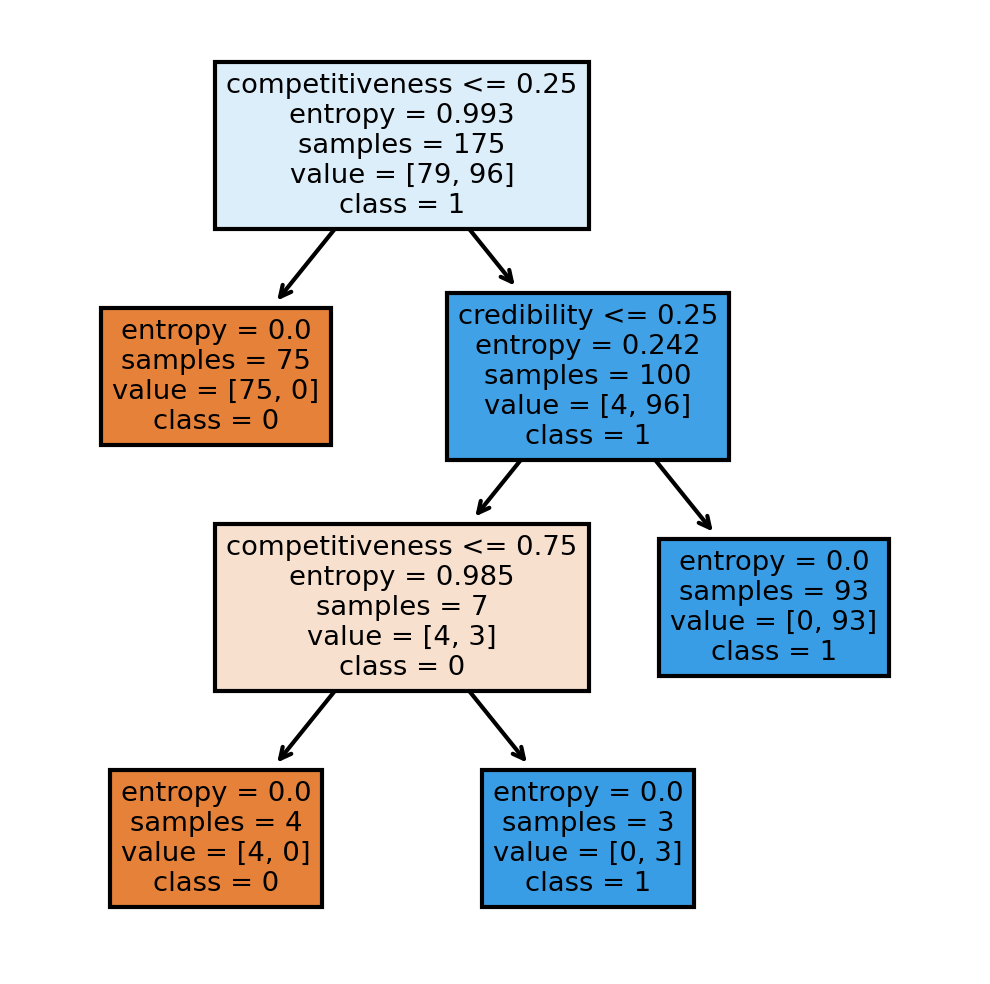

In [41]:
fn=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']
cn=['0' , '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [42]:
#Predicting on test data
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [43]:
pd.Series(y_pred_dt).value_counts()

1    46
0    29
dtype: int64

Confusion Matrix

In [44]:
# Confusion Matrix for the model accuracy
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
confusion_matrix_dt

array([[28,  0],
       [ 1, 46]], dtype=int64)

In [45]:
#Classification Report 
print (classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [46]:
 accuracy_score(y_test, y_pred_dt)

0.9866666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria 

The Gini Index or Impurity measures the probability for a random instance being misclassified when chosen randomly.

In [47]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)
dt_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [48]:
dt_gini.score(x_train, y_train)

1.0

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Random Forest  

# Using K-folds cross validation

In [49]:
kfold=KFold(n_splits=5,random_state=72,shuffle=True)

In [50]:
rf =RandomForestClassifier(n_estimators=100,max_features =3)
results_rf =cross_val_score(rf,x,y,cv=kfold)
results_rf

array([0.98, 1.  , 1.  , 0.98, 1.  ])

In [51]:
# Accuracy
print(np.mean(results_rf))

0.992


#  with k-fold we got accuracy as 99%


# Bagging classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions

#### bagging for train test split

In [52]:
bag_c=BaggingClassifier()
bag1 =bag_c.fit(x_train,y_train)
bag1.score(x_train,y_train)

1.0

In [53]:
bag1.score(x_test,y_test)

0.9866666666666667


#### Bagging  for D.T classifier use kfold split

In [54]:
model_bag = BaggingClassifier(n_estimators=50, random_state=7)
result_bag = cross_val_score(model_bag, x, y, cv=kfold)
result_bag

array([0.98, 1.  , 1.  , 0.98, 1.  ])

In [55]:
#Accuracy
print(result_bag.mean())

0.992


###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# KNN Classifier

In [56]:
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [57]:
y_pred_knn = model_knn.predict(x_test)
y_pred_knn

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [58]:
#Accuracy
print(accuracy_score(y_test, y_pred_knn))

0.9866666666666667


###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Support Vector machine 

In [59]:
model_linear = SVC(kernel = "poly")
model_linear.fit(x_train,y_train)
y_pred_svm = model_linear.predict(x_test)
y_pred_svm

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [60]:
np.mean(y_pred_svm==y_test)

0.9866666666666667

In [61]:
#Classification Report 
print (classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### AdaBoost Classification


In [62]:
model_ab= AdaBoostClassifier(n_estimators=60, random_state=8)        
result_ab = cross_val_score(model_ab, x, y, cv=kfold)
result_ab

array([1.  , 1.  , 1.  , 0.98, 0.98])

In [63]:
#Accuracy
print(result_ab.mean())

0.992


###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Naive Bayes


##### Gaussian Naive Bayes
Gaussian Naive Bayes is a classification technique used in Machine Learning (ML) based on the probabilistic approach and Gaussian distribution.

In [64]:
classifier_GB = gb()
classifier_GB.fit(x_train,y_train)
y_pred_gb = model_linear.predict(x_test)
y_pred_gb

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [65]:
# Confusion Matrix for the model accuracy
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
confusion_matrix_gb

array([[28,  0],
       [ 1, 46]], dtype=int64)

In [66]:
accuracy_score(y_test, y_pred_gb)

0.9866666666666667

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 4. Model Evaluation


### Accuracy Table


In [67]:
data_model_acc = pd.DataFrame({'Models':['LogisticReg','DecisionTree','RandomForest','Bagging','KNN','SVM','AdaBoost','NaiveBayes'],
                            'Accuracy':[accuracy_score(y_test, y_pred_lr),
                                        accuracy_score(y_test, y_pred_dt),
                                        np.mean(results_rf),
                                        result_bag.mean(),
                                        accuracy_score(y_test, y_pred_knn),
                                        np.mean(y_pred_svm==y_test),
                                        result_ab.mean(),
                                        accuracy_score(y_test, y_pred_gb)
                                         
                                            ] })

data_model_acc



,Models,Accuracy
0,LogisticReg,0.986667
1,DecisionTree,0.986667
2,RandomForest,0.992000
3,Bagging,0.992000
4,KNN,0.986667
5,SVM,0.986667
6,AdaBoost,0.992000
7,NaiveBayes,0.986667


###### Random Forest is give the best accuracy than other models.